In [5]:
from modeles.SIRModel import SIRModel
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Test sur resultat connu (voir https://www.lri.fr/~estrade/exam_01.html)

paramètres model = [1.00013692 0.09999554] => True = [1, 0.1]


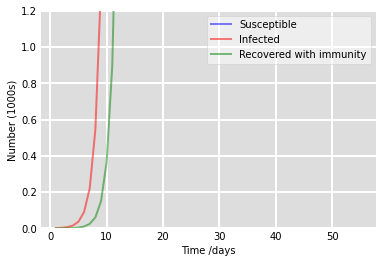

paramètres model = [0.00996143 0.00496566] => True = [0.01, 0.005]


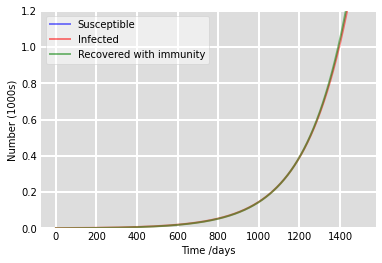

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/covid/src/modeles/SIRModel.py:42: RuntimeWarning: overflow encountered in double_scalars
  dSdt = -beta * S * I / N
/home/covid/src/modeles/SIRModel.py:43: RuntimeWarning: overflow encountered in double_scalars
  dIdt = beta * S * I / N - gamma * I
/home/covid/src/modeles/SIRModel.py:44: RuntimeWarning: overflow encountered in double_scalars
  dRdt = gamma * I
/home/covid/src/modeles/SIRModel.py:43: RuntimeWarning: invalid value encountered in double_scalars
  dIdt = beta * S * I / N - gamma * I


paramètres model = [0.49916021 0.19919598] => True = [0.5, 0.2]


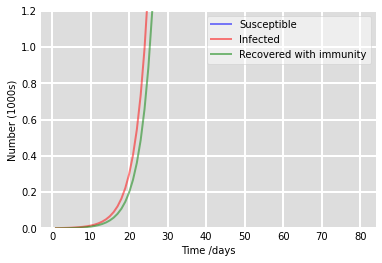

In [6]:
resultat = [[1, 0.1], [0.01, 0.005], [0.5, 0.2 ]]

for count, size_pop, list_resultat in zip( range(1,4), [55000000, 67000, 7700000000], resultat):
    
    df = pd.read_csv("/home/covid/dataset/data_{}.csv".format(count))
    N = size_pop
    I0, R0 = 1, 0
    S0 = N - df["I"][0] - R0
    t = np.linspace(1, df.shape[0], df.shape[0]) 

    sir_model = SIRModel()
    params, covariance = sir_model.fit(t, df["I"], N)
    print("paramètres model = {} => True = {}".format(params, list_resultat))
    
    S, I, R = sir_model.predict(t, size_pop, 1)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

In [8]:
from my_framework.etl import *
df = get_confirm_df()
["Country/Region"]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261           Western Sahara
262    Sao Tome and Principe
263                    Yemen
264                  Comoros
265               Tajikistan
Name: Country/Region, Length: 266, dtype: object

In [3]:
from my_framework.etl import *

df, count = get_dataset("France")
count

65129731

,confirm,recover,death
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,2,0,0
1/25/20,3,0,0
1/26/20,3,0,0
...,...,...,...
5/1/20,167305,50212,24597
5/2/20,168518,50663,24763
5/3/20,168925,50885,24900
5/4/20,169583,51476,25204


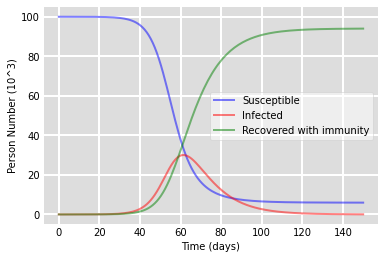

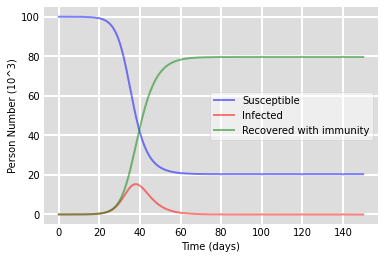

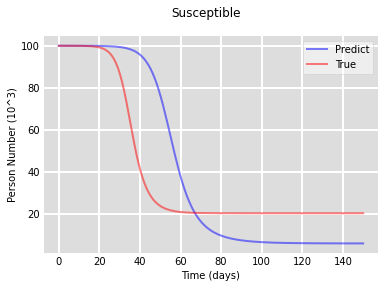

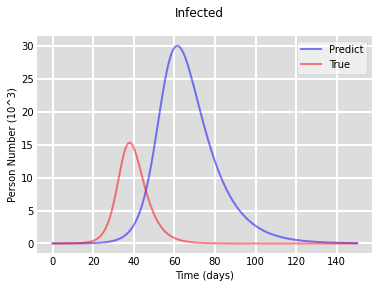

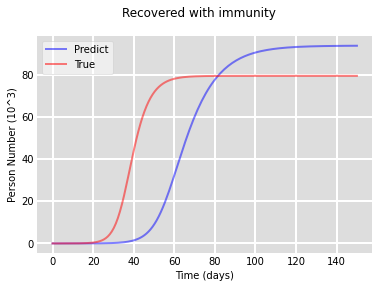

In [2]:
from modeles.SIRModel import SIRModel
from my_framework.plot import plot_simple_sir, plot_triple_sir

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

sir_model = SIRModel(beta=0.3, gamma=0.1)
sir_model_2 = SIRModel(beta=0.6, gamma=0.3)
N = 100000
t = np.linspace(0,150,150)
S, I, R = sir_model.predict(t, N, 1)
S2, I2, R2 = sir_model_2.predict(t, N, 1)
plot_simple_sir(S, I, R, t)
plot_simple_sir(S2, I2, R2, t)
plot_triple_sir(S, I, R, S2, I2, R2, t)

In [1]:
def plot_simple_sir(list_S, list_I, list_R, list_t):
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(facecolor='#dddddd')
    ax.plot(t, list_S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, list_I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, list_R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Person Number (10^3)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

In [2]:
def plot_triple_sir(list_predict_S, list_predict_I, list_predict_R, list_true_S, list_true_I, list_true_R, list_t):
    list_label = ["Susceptible", "Infected", "Recovered with immunity"]
    for (list_pred, list_true), tilte in zip([[list_predict_S, list_true_S], [list_predict_I, list_true_I], [list_predict_R, list_true_R]], list_label):
            fig = plt.figure()
            ax = fig.add_subplot(facecolor='#dddddd')
            ax.plot(t, list_pred/1000, 'b', alpha=0.5, lw=2, label='Predict')
            ax.plot(t, list_true/1000, 'r', alpha=0.5, lw=2, label='True')
            ax.set_xlabel('Time (days)')
            ax.set_ylabel('Person Number (10^3)')
            ax.yaxis.set_tick_params(length=0)
            ax.xaxis.set_tick_params(length=0)
            ax.grid(b=True, which='major', c='w', lw=2, ls='-')
            legend = ax.legend()
            legend.get_frame().set_alpha(0.5)
            for spine in ('top', 'right', 'bottom', 'left'):
                ax.spines[spine].set_visible(False)
            fig.suptitle(tilte)
            plt.show()